In [2]:
#importing required libraries
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
from matplotlib import image as img
from matplotlib import pyplot as plt

In [11]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


Angles Needed to Compare:

1)Left Elbow (le)

2)Right Elbow (re)

3)Left Arm Lift (lal)

4)Right Arm Lift (ral)

5)Left Bend (lb) (Not pounds ;) 

6)Right Bend (rb) 

7)Left Knee (lk)

8)Right Knee (rk)

In [9]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return round(angle,2)

In [13]:
#Dictionary to store all values
angles={}

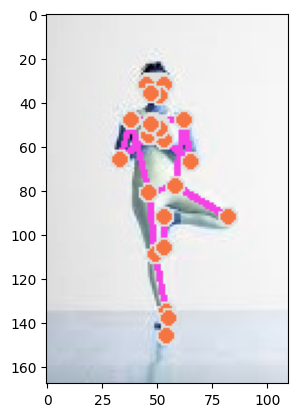

[x: 0.44719037413597107
y: 0.20369164645671844
z: -0.3864385187625885
visibility: 0.9979562759399414
, x: 0.46128180623054504
y: 0.18874800205230713
z: -0.3358502686023712
visibility: 0.9976224303245544
, x: 0.46865561604499817
y: 0.1885887086391449
z: -0.3359188735485077
visibility: 0.9968631267547607
, x: 0.47501233220100403
y: 0.18866580724716187
z: -0.3360602855682373
visibility: 0.9971242547035217
, x: 0.43646618723869324
y: 0.18822839856147766
z: -0.3404136896133423
visibility: 0.998100221157074
, x: 0.42760348320007324
y: 0.18802839517593384
z: -0.3404194712638855
visibility: 0.9974514842033386
, x: 0.41990336775779724
y: 0.18813544511795044
z: -0.34059426188468933
visibility: 0.9978725910186768
, x: 0.490727961063385
y: 0.19346201419830322
z: -0.04695183411240578
visibility: 0.9968913197517395
, x: 0.41144633293151855
y: 0.19413205981254578
z: -0.06588193029165268
visibility: 0.9956653714179993
, x: 0.4665463864803314
y: 0.22086326777935028
z: -0.27814981341362
visibility: 0.99

In [17]:
#Pose check on tree pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
img_ = cv2.imread("tree2.jpg")
image = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

results = pose.process(image)

image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                          mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                          )

plt.imshow(image)
plt.show()

try:
    landmarks = results.pose_landmarks.landmark
    print(landmarks)
except:
    pass

In [18]:
#Getting angles and storing it in the dictionary
l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

#Angles
#Left Elbow (le)
angles['le'] = calculate_angle(l_shoulder, l_elbow, l_wrist)

#Right Elbow (re)
angles['re'] = calculate_angle(r_shoulder, r_elbow, r_wrist)

#Left Arm Lift (lal)
angles['lal'] = calculate_angle(l_elbow, l_shoulder, l_hip)

#Right Arm Lift (ral)
angles['ral'] = calculate_angle(r_elbow, r_shoulder, r_hip)

#Left Bend (lb) (Not pounds ;) 
angles['lb'] = calculate_angle(l_shoulder, l_hip, l_knee)

#Right Bend (rb) 
angles['rb'] = calculate_angle(r_shoulder, r_hip, r_knee)

#Left Knee (lk)
angles['lk'] = calculate_angle(l_hip, l_knee, l_ankle)

#Right Knee (rk)
angles['rk'] = calculate_angle(r_hip, r_knee, r_ankle)

In [19]:
angles

{'le': 47.76,
 're': 39.84,
 'lal': 27.48,
 'ral': 43.99,
 'lb': 98.32,
 'rb': 169.75,
 'lk': 23.4,
 'rk': 176.02}

In [28]:
cap = cv2.VideoCapture("tree2vid.mp4")
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            l_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            l_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            l_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            vid_le = calculate_angle(l_shoulder, l_elbow, l_wrist)
            vid_re = calculate_angle(r_shoulder, r_elbow, r_wrist)
            vid_lal = calculate_angle(l_elbow, l_shoulder, l_hip)
            vid_ral = calculate_angle(r_elbow, r_shoulder, r_hip)
            vid_lb = calculate_angle(l_shoulder, l_hip, l_knee)
            vid_rb = calculate_angle(r_shoulder, r_hip, r_knee)
            vid_lk = calculate_angle(l_hip, l_knee, l_ankle)
            vid_rk = calculate_angle(r_hip, r_knee, r_ankle)

            if(vid_re > angles['re']+10) :
                cv2.putText(image, "RIGHT ELBOW : BEND", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_re < angles['re']-10) :
                cv2.putText(image, "RIGHT ELBOW : BENT TOO MUCH", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT : CORRECT!!!", (140,140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['le']+10) :
                cv2.putText(image, "LEFT ELBOW : BEND", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['le']-10) :
                cv2.putText(image, "LEFT ELBOW : BENT TOO MUCH", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT ARM : CORRECT!!!", (140,160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['lal']+10) :
                cv2.putText(image, "LEFT ARM : LIFT", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['lal']-10) :
                cv2.putText(image, "LEFT ARM : LIFTED TOO MUCH", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (140,180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['ral']+10) :
                cv2.putText(image, "RIGHT ARM : LIFT", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['ral']-10) :
                cv2.putText(image, "RIGHT ARM : LIFTED TOO MUCH", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (140,200), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['lb']+10) :
                cv2.putText(image, "LEFT SIDE : BEND", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['lb']-10) :
                cv2.putText(image, "LEFT SIDE : BENT TOO MUCH", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT SIDE : CORRECT!!!", (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['rb']+10) :
                cv2.putText(image, "RIGHT SIDE : BEND", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['rb']-10) :
                cv2.putText(image, "RIGHT SIDE : BENT TOO MUCH", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT SIDE : CORRECT!!!", (140,240), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            if(vid_le > angles['lk']+10) :
                cv2.putText(image, "LEFT KNEE : BEND", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['lk']-10) :
                cv2.putText(image, "LEFT KNEE : BENT TOO MUCH", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "LEFT KNEE : CORRECT!!!", (140,260), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            if(vid_le > angles['rk']+10) :
                cv2.putText(image, "RIGHT KNEE : BEND", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            elif(vid_le < angles['rk']-10) :
                cv2.putText(image, "RGIHT KNEE : BENT TOO MUCH", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            else :
                cv2.putText(image, "RIGHT KNEE : CORRECT!!!", (140,280), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)        
        
        except:
            pass

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

    cap.release()
    cv2.destroyAllWindows()

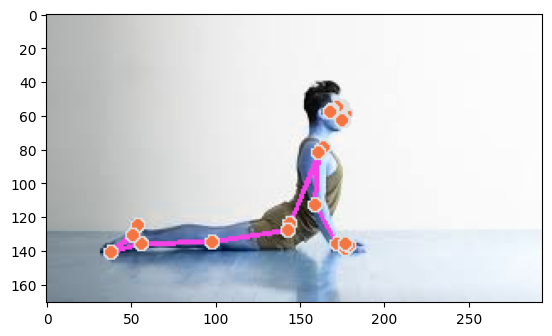

[x: 0.6038486361503601
y: 0.34677252173423767
z: -0.07393418252468109
visibility: 0.9967754483222961
, x: 0.5954592227935791
y: 0.3259122371673584
z: -0.05185526981949806
visibility: 0.9958851933479309
, x: 0.5944693088531494
y: 0.3250338137149811
z: -0.051913630217313766
visibility: 0.9957558512687683
, x: 0.5934135913848877
y: 0.3240128755569458
z: -0.05193177983164787
visibility: 0.9970811009407043
, x: 0.5930007696151733
y: 0.32731756567955017
z: -0.08975228667259216
visibility: 0.9981449842453003
, x: 0.590512752532959
y: 0.32746943831443787
z: -0.08975435793399811
visibility: 0.9978873133659363
, x: 0.5880105495452881
y: 0.32736435532569885
z: -0.0897628515958786
visibility: 0.9981186985969543
, x: 0.5768956542015076
y: 0.3339151442050934
z: 0.03314319998025894
visibility: 0.9968127608299255
, x: 0.5717633366584778
y: 0.3394632041454315
z: -0.1397096812725067
visibility: 0.9974498152732849
, x: 0.6003905534744263
y: 0.3700537085533142
z: -0.04084531217813492
visibility: 0.9974350

In [8]:
#Pose check on cobra pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
img_ = cv2.imread("cobra.jpg")
image = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
image.flags.writeable = False

results = pose.process(image)

image.flags.writeable = True
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                          mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                          )
plt.imshow(image)
plt.show()
try:
    landmarks = results.pose_landmarks.landmark
    print(landmarks)
except:
    pass

In [3]:
#Camera Check
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Mediapipe Feed', frame)
    
        if cv2.waitKey(10) & 0xFF == ord('x'):
            break
    else:
            break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
#Pose check on camera
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('x'):
            break

    cap.release()
    cv2.destroyAllWindows()